## Resource Model metrics and comparisons

Work with Arches-based resource models (RM)

Load GitHub repository and requirements

In [ ]:
# Download and install latest version of Arches graph parser
!rm cultural-heritage -R
!git clone https://github.com/achp-project/cultural-heritage.git
!pip install -r cultural-heritage/graph-parser/requirements.txt

Load libraries

In [ ]:
import os
import urllib.request
import pandas as pd
import ipywidgets as widgets
from ipywidgets import interact, interactive
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import re
from IPython.display import HTML
from pyvis import network as net
import folium
import json

Projects extents (map)

In [ ]:
# TODO: loop over 'cultural-heritage/map-projects/prj-extent/' to collect all GeoJSON
m = folium.Map(zoom_start=8)
geojson1 = json.load(open('cultural-heritage/map-projects/prj-extent/eamena.geojson'))
geojson1 = folium.GeoJson(geojson1)
geojson1.add_to(m)
m

List of available RMs

In [36]:
# Download uploaded cultural heritage partners graphs
# remote_source_files = {
#     "MAPSS": "https://raw.githubusercontent.com/achp-project/prj-mapss/main/pkg/graphs/Heritage%20Place%20(3).json",
#     "MAHS": "https://raw.githubusercontent.com/achp-project/prj-mahs/main/Site.json",
#     "MAHSA": "https://raw.githubusercontent.com/achp-project/prj-mahsa/main/resource-models/Heritage%20Location%20Resource%20Model.json",
#     "MAEASAM": "https://raw.githubusercontent.com/achp-project/prj-maeasam/main/Site.json",
#     "EAMENA": "https://raw.githubusercontent.com/achp-project/prj-eamena-marea/main/resource_models/Heritage%20Place.json",
# }
def rm_list():
	"""
	Return a dictionary of RMs

	Project names as keys and GitHub URL as values

	:Example:
	>> remote_source_files = rm_list
	"""
	remote_source_files = {
		"MAPSS": "https://raw.githubusercontent.com/achp-project/prj-mapss/main/pkg/graphs/Heritage%20Place%20(3).json",
		"MAHS": "https://raw.githubusercontent.com/achp-project/prj-mahs/main/Site.json",
		"MAHSA": "https://raw.githubusercontent.com/achp-project/prj-mahsa/main/resource-models/Heritage%20Location%20Resource%20Model.json",
		"MAEASAM": "https://raw.githubusercontent.com/achp-project/prj-maeasam/main/Site.json",
		"EAMENA": "https://raw.githubusercontent.com/achp-project/prj-eamena-marea/main/resource_models/Heritage%20Place.json",
	}
	return(remote_source_files)

remote_source_files = rm_list()

Select two or more RMs to compare (checkoxes). Choose: MAHSA and EAMENA.

In [40]:
# def generate_checkboxes_from_dict(input_dict):
#     checkboxes = {key: widgets.Checkbox(description=key, value=False) for key in input_dict.keys()}
#     return checkboxes
# checkboxes_dict = generate_checkboxes_from_dict(remote_source_files)
# def get_and_print_checked_values(**kwargs):
#     checked_values = {key: value for key, value in kwargs.items() if isinstance(value, widgets.Checkbox) and value.value}
# interactive_widget = interactive(get_and_print_checked_values, **checkboxes_dict)
# display(interactive_widget)

# check boxes
def generate_checkboxes_from_dict(input_dict):
    """
	Generate checkboxes from dict

	Check boxes

    :param input_dict: a dictionary of RMs

	:Example:
	>> checkboxes_dict = generate_checkboxes_from_dict(remote_source_files)
	"""
    checkboxes = {key: widgets.Checkbox(description=key, value=False) for key in input_dict.keys()}
    return checkboxes

def get_and_print_checked_values(**kwargs):
    """
	Get responses from a checkboxes widget

	Check boxes

    :param input_dict: a dictionary of RMs

	:Example:
	>> checkboxes_dict = generate_checkboxes_from_dict(remote_source_files)
    >> interactive_widget = interactive(get_and_print_checked_values, **checkboxes_dict)
    >> display(interactive_widget)
	"""
    checked_values = {key: value for key, value in kwargs.items() if isinstance(value, widgets.Checkbox) and value.value}
    return checked_values

# remote_source_files = rm_list()
checkboxes_dict = generate_checkboxes_from_dict(remote_source_files)
interactive_widget = interactive(get_and_print_checked_values, **checkboxes_dict)
display(interactive_widget)

interactive(children=(Checkbox(value=False, description='MAPSS'), Checkbox(value=False, description='MAHS'), C…

Retrieve and show selected RM keys

In [44]:
# selected_keys = []
# for key, checkbox in checkboxes_dict.items():
#     if checkbox.value:
#         selected_keys.append(key)
# print("Selected projects:", selected_keys)
# if len(selected_keys) < 2:
#     print("Please select a minimum of two different JSON files")
# else:
#     subset_remote_source_files = {}
#     # Iterate through the selected keys and add corresponding key-value pairs to the subset dictionary
#     for key in selected_keys:
#         if key in remote_source_files:
#             subset_remote_source_files[key] = remote_source_files[key]
#     print("Selected RMs:", subset_remote_source_files)

# !rm inputResourceModels -R
# !mkdir -p inputResourceModels

# for (project_name, resource_model_url) in subset_remote_source_files.items():
#   target_filename = f"{project_name}_{resource_model_url.split('/')[-1]}"
#   # print(target_filename)
#   urllib.request.urlretrieve(resource_model_url, filename=f"inputResourceModels/{target_filename}")
def rm_selected(checkboxes_dict, remote_source_files):
	"""
	Load RMs into the folder 'inputResourceModels/'

	Check boxes

    :param checkboxes_dict: checkboxes with answers
	:param remote_source_files: list of the RMs

	:Example:
	>> rm_selected()
	"""
	selected_keys = []
	for key, checkbox in checkboxes_dict.items():
		if checkbox.value:
			selected_keys.append(key)
	print("Selected projects:", selected_keys)
	if len(selected_keys) < 2:
		print("Please select a minimum of two different JSON files")
	else:
		subset_remote_source_files = {}
		# Iterate through the selected keys and add corresponding key-value pairs to the subset dictionary
		for key in selected_keys:
			if key in remote_source_files:
				subset_remote_source_files[key] = remote_source_files[key]
		print("Selected RMs:", subset_remote_source_files)

	!rm inputResourceModels -R
	!mkdir -p inputResourceModels

	for (project_name, resource_model_url) in subset_remote_source_files.items():
		target_filename = f"{project_name}_{resource_model_url.split('/')[-1]}"
		# print(target_filename)
		urllib.request.urlretrieve(resource_model_url, filename=f"inputResourceModels/{target_filename}")
rm_selected(checkboxes_dict, remote_source_files)

Selected projects: ['MAHSA', 'MAEASAM']
Selected RMs: {'MAHSA': 'https://raw.githubusercontent.com/achp-project/prj-mahsa/main/resource-models/Heritage%20Location%20Resource%20Model.json', 'MAEASAM': 'https://raw.githubusercontent.com/achp-project/prj-maeasam/main/Site.json'}


Create subgraph and comparison dataframe csv files by running [graph-parser.py](https://github.com/achp-project/cultural-heritage/blob/main/graph-parser/graph_parser.py) and [graph-comparator.py](https://github.com/achp-project/cultural-heritage/blob/main/graph-parser/graph_comparator.py)

In [ ]:
!python cultural-heritage/graph-parser/graph_comparator.py -d -m list -o subgraphMetrics.csv inputResourceModels/*.json
!python cultural-heritage/graph-parser/graph_comparator.py -d -m compare -o comparisonMetrics.csv inputResourceModels/*.json
# Generate pandas Dataframes from csv
subgraph_metrics = pd.read_csv('subgraphMetrics.csv')
comparison_metrics = pd.read_csv('comparisonMetrics.csv')

Show subgraph metrics (see: [documentation](https://github.com/achp-project/cultural-heritage/blob/main/graph-parser/README.md#minimal_subgraph_data))

In [46]:
# subgraph_metrics = pd.read_csv('subgraphMetrics.csv')
# col_order = ['G', 'source', 'target', 'property', 'source_id', 'target_id', 'source_name', 'target_name']
# subgraph_metrics.rename(columns={'graph_name': 'G',
# 								 'source_property': 'source',
# 								 'target_property': 'target',
# 								 'relation_type': 'property'}, inplace=True)
# subgraph_metrics['source_id'] = subgraph_metrics['source'] + '_' + subgraph_metrics['G']
# subgraph_metrics['target_id'] = subgraph_metrics['target'] + '_' + subgraph_metrics['G']
# subgraph_metrics = subgraph_metrics[col_order]
# subgraph_metrics

def subgraph_metrics(subgraph_metrics = 'subgraphMetrics.csv'):
	"""
	Table of subgraph metrics

    :param subgraph_metrics: a CSV file

	:Example:
	>> subgraph_metrics = subgraph_metrics()
	"""
	subgraph_metrics = pd.read_csv(subgraph_metrics)
	col_order = ['G', 'source', 'target', 'property', 'source_id', 'target_id', 'source_name', 'target_name']
	subgraph_metrics.rename(columns={'graph_name': 'G',
									'source_property': 'source',
									'target_property': 'target',
									'relation_type': 'property'}, inplace=True)
	subgraph_metrics['source_id'] = subgraph_metrics['source'] + '_' + subgraph_metrics['G']
	subgraph_metrics['target_id'] = subgraph_metrics['target'] + '_' + subgraph_metrics['G']
	subgraph_metrics = subgraph_metrics[col_order]
	return subgraph_metrics

subgraph_metrics = subgraph_metrics()
subgraph_metrics

,G,source,target,property,source_id,target_id,source_name,target_name
0,MAHS_Site,E28_Conceptual_Object,E42_Identifier,P1_is_identified_by,E28_Conceptual_Object_MAHS_Site,E42_Identifier_MAHS_Site,Citation 2,Citation URL
1,MAHS_Site,E84_Information_Carrier,E35_Title,P102_has_title,E84_Information_Carrier_MAHS_Site,E35_Title_MAHS_Site,Information Carrier 2,Caption
2,MAHS_Site,E84_Information_Carrier,E55_Type,P2_has_type,E84_Information_Carrier_MAHS_Site,E55_Type_MAHS_Site,Information Carrier 2,Information Carrier Format Type
3,MAHS_Site,E27_Site,E55_Type,P2_has_type,E27_Site_MAHS_Site,E55_Type_MAHS_Site,Site,Functional Classification
4,MAHS_Site,E27_Site,E55_Type,P2_has_type,E27_Site_MAHS_Site,E55_Type_MAHS_Site,Site,Keyword
...,...,...,...,...,...,...,...,...
255,MAPSS_Heritage%20Place%20(3),E27_Site,E42_Identifier,P48_has_preferred_identifier,E27_Site_MAPSS_Heritage%20Place%20(3),E42_Identifier_MAPSS_Heritage%20Place%20(3),Heritage Place,MAPSS_HP_ID
256,MAPSS_Heritage%20Place%20(3),S4_Observation,E29_Design_or_Procedure,O8_observed,S4_Observation_MAPSS_Heritage%20Place%20(3),E29_Design_or_Procedure_MAPSS_Heritage%20Place...,Heritage Place Component Observation,Component Construction Technique
257,MAPSS_Heritage%20Place%20(3),I2_Belief,E3_Condition_State,P117i_includes,I2_Belief_MAPSS_Heritage%20Place%20(3),E3_Condition_State_MAPSS_Heritage%20Place%20(3),Disturbance Effect Belief,Damage Effect
258,MAPSS_Heritage%20Place%20(3),E53_Place,E55_Type,P2_has_type,E53_Place_MAPSS_Heritage%20Place%20(3),E55_Type_MAPSS_Heritage%20Place%20(3),Geography,Heritage Feature Orientation Type


Compararison metrics (see: [documentation](https://github.com/achp-project/cultural-heritage/blob/main/graph-parser/README.md#graph_comparison_data))

In [47]:
# comparison_metrics = pd.read_csv('comparisonMetrics.csv')
# col_order = ['G', 'source', 'target', 'property', 'source_id', 'target_id'] # without source_name and target_name
# comparison_metrics.rename(columns={'graph_name': 'G',
# 								   'source_property': 'source',
# 								   'target_property': 'target',
# 								   'relation_type': 'property'}, inplace=True)
# comparison_metrics['G'] = 'both' # comparison_metrics['graph_name_1'] + "_x_" + comparison_metrics['graph_name_2']
# comparison_metrics['source_id'] = comparison_metrics['source'] + '_' + comparison_metrics['G']
# comparison_metrics['target_id'] = comparison_metrics['target'] + '_' + comparison_metrics['G']
# comparison_metrics = comparison_metrics[col_order]
# comparison_metrics

def comparison_metrics(comparison_metrics = 'comparisonMetrics.csv'):
	"""
	Table of comparison metrics

    :param comparison_metrics: a CSV file

	:Example:
	>> comparison_metrics = comparison_metrics()
	>> comparison_metrics
	"""
	comparison_metrics = pd.read_csv(comparison_metrics)
	col_order = ['G', 'source', 'target', 'property', 'source_id', 'target_id'] # without source_name and target_name
	comparison_metrics.rename(columns={'graph_name': 'G',
									'source_property': 'source',
									'target_property': 'target',
									'relation_type': 'property'}, inplace=True)
	comparison_metrics['G'] = 'both' # comparison_metrics['graph_name_1'] + "_x_" + comparison_metrics['graph_name_2']
	comparison_metrics['source_id'] = comparison_metrics['source'] + '_' + comparison_metrics['G']
	comparison_metrics['target_id'] = comparison_metrics['target'] + '_' + comparison_metrics['G']
	comparison_metrics = comparison_metrics[col_order]
	return comparison_metrics

comparison_metrics = comparison_metrics()
comparison_metrics

,G,source,target,property,source_id,target_id
0,both,E3_Condition_State,E55_Type,P2_has_type,E3_Condition_State_both,E55_Type_both
1,both,E53_Place,E55_Type,P2_has_type,E53_Place_both,E55_Type_both
2,both,E13_Attribute_Assignment,E62_String,P3_has_note,E13_Attribute_Assignment_both,E62_String_both
3,both,E16_Measurement,E55_Type,P2_has_type,E16_Measurement_both,E55_Type_both
4,both,E41_Appellation,E55_Type,P2_has_type,E41_Appellation_both,E55_Type_both
5,both,E55_Type,E55_Type,P2_has_type,E55_Type_both,E55_Type_both
6,both,E54_Dimension,E60_Number,P90_has_value,E54_Dimension_both,E60_Number_both
7,both,E53_Place,E53_Place,P89_falls_within,E53_Place_both,E53_Place_both


### Graphs



Graph graphical parameters, complete dataframe and functions

In [50]:
# node_size = 200
# font_size = 10
# edge_width = .5
# fig_dim = 10
# node_color = "#add8e6" # lightblue

# subgraph_metrics['weight'] = edge_width
# comparison_metrics['weight'] = edge_width * 2

# # Concatenation of subgraphs and comparison metrics and drops duplicates.Get subgraphs in both RM, and remove duplicated subgraphs
# df_all_match = pd.concat([subgraph_metrics, comparison_metrics])
# df_all_match = df_all_match.drop_duplicates()
# df_all_match_copy = df_all_match.copy() # deep copy
# df_all_match_copy['uniq'] = df_all_match_copy['source'] + "_" + df_all_match_copy['property'] + df_all_match_copy['target'] # field with unique id
# # get 'both' rows in a separated df
# df_both = df_all_match_copy.loc[df_all_match_copy['G'] == 'both'] # both dataframe
# both_uniq = list(set(df_both['uniq'])) # get uniq ID in the 'both' dataframe
# df_all_match_copy = df_all_match_copy[~df_all_match_copy['uniq'].isin(both_uniq)] # drop both from the main dataframe
# df_all_complete = pd.concat([df_both, df_all_match_copy])

# def create_graph(rm):
#   # filter on graph label
#   # condition = df_all_match['G'] == rm
#   # condition = df_all_match['G'] in rm
#   # df_G = df_all_match[condition]
#   df_G = df_all_match[df_all_match.G.isin([rm])]
#   G = nx.from_pandas_edgelist(df_G, 'source_id', 'target_id', True, create_using=nx.DiGraph())
#   G_attrs_nodes = {}
#   # clean
#   rm_ = '_' + rm
#   for i, node in enumerate(G.nodes()):
#     a = re.sub(rm_, '', node)
#     G_attrs_nodes[node] = {'entity': a, 'G': rm}
#   nx.set_node_attributes(G, G_attrs_nodes)
#   return(G)

# def edges_labels(dict):
#     newdict = {}
#     for ed, value in dict.items():
#       # short the name
#       val = re.sub(r'_.*', '',  value)
#       newdict[ed] = val
#     return(newdict)

# def nodes_labels(dict):
#     newdict = {}
#     for node, value in dict.items():
#       # short the name
#       val = re.sub(r'_.*', '',  value)
#       newdict[node] = val
#     return(newdict)

# def plot_G(digraph):
#   p = nx.circular_layout(digraph)
#   labels_nodes = nx.get_node_attributes(digraph, 'entity')
#   labels_nodes = nodes_labels(labels_nodes)
#   labels_edges = nx.get_edge_attributes(digraph, 'property')
#   labels_edges = edges_labels(labels_edges)
#   plt.figure(figsize = (fig_dim + 6, fig_dim - 1))
#   nx.draw(digraph, pos = p, labels = labels_nodes, with_labels = True, node_size = node_size, node_color = node_color, font_size = font_size, width = edge_width)
#   nx.draw_networkx_edge_labels(digraph, pos = p, edge_labels = labels_edges, font_size = font_size)
#   plt.show()

def all_match(subgraph_metrics, comparison_metrics):
	df_all_match = pd.concat([subgraph_metrics, comparison_metrics])
	df_all_match = df_all_match.drop_duplicates()
	return(df_all_match)


def subgraph_comparison_merge(subgraph_metrics, comparison_metrics):
	# Concatenation of subgraphs and comparison metrics and drops duplicates.Get subgraphs in both RM, and remove duplicated subgraphs
	# df_all_match = pd.concat([subgraph_metrics, comparison_metrics])
	df_all_match = all_match(subgraph_metrics, comparison_metrics)
	df_all_match_copy = df_all_match.copy() # deep copy
	df_all_match_copy['uniq'] = df_all_match_copy['source'] + "_" + df_all_match_copy['property'] + df_all_match_copy['target'] # field with unique id
	# get 'both' rows in a separated df
	df_both = df_all_match_copy.loc[df_all_match_copy['G'] == 'both'] # both dataframe
	both_uniq = list(set(df_both['uniq'])) # get uniq ID in the 'both' dataframe
	df_all_match_copy = df_all_match_copy[~df_all_match_copy['uniq'].isin(both_uniq)] # drop both from the main dataframe
	df_all_complete = pd.concat([df_both, df_all_match_copy])
	return df_all_complete


def create_graph(rm, subgraph_metrics, comparison_metrics, edge_width = .5):
  # filter on graph label
  # condition = df_all_match['G'] == rm
  # condition = df_all_match['G'] in rm
  # df_G = df_all_match[condition]
	subgraph_metrics['weight'] = edge_width
	comparison_metrics['weight'] = edge_width * 2
	# df_all_match = pd.concat([subgraph_metrics, comparison_metrics])
	df_all_match = all_match(subgraph_metrics, comparison_metrics)
	df_G = df_all_match[df_all_match.G.isin([rm])]
	G = nx.from_pandas_edgelist(df_G, 'source_id', 'target_id', True, create_using=nx.DiGraph())
	G_attrs_nodes = {}
	# clean
	rm_ = '_' + rm
	for i, node in enumerate(G.nodes()):
		a = re.sub(rm_, '', node)
		G_attrs_nodes[node] = {'entity': a, 'G': rm}
		nx.set_node_attributes(G, G_attrs_nodes)
	return G

def edges_labels(dict):
    newdict = {}
    for ed, value in dict.items():
      # short the name
      val = re.sub(r'_.*', '',  value)
      newdict[ed] = val
    return newdict

def nodes_labels(dict):
    newdict = {}
    for node, value in dict.items():
      # short the name
      val = re.sub(r'_.*', '',  value)
      newdict[node] = val
    return newdict

def plot_G(digraph, node_size = 200, node_color = "#add8e6", font_size = 10, fig_dim = 10):
  p = nx.circular_layout(digraph)
  labels_nodes = nx.get_node_attributes(digraph, 'entity')
  labels_nodes = nodes_labels(labels_nodes)
  labels_edges = nx.get_edge_attributes(digraph, 'property')
  labels_edges = edges_labels(labels_edges)
  plt.figure(figsize = (fig_dim + 6, fig_dim - 1))
  nx.draw(digraph, pos = p, labels = labels_nodes, with_labels = True, node_size = node_size, node_color = node_color, font_size = font_size, width = edge_width)
  nx.draw_networkx_edge_labels(digraph, pos = p, edge_labels = labels_edges, font_size = font_size)
  plt.show()

Plot individual graphs

MAHS_Site


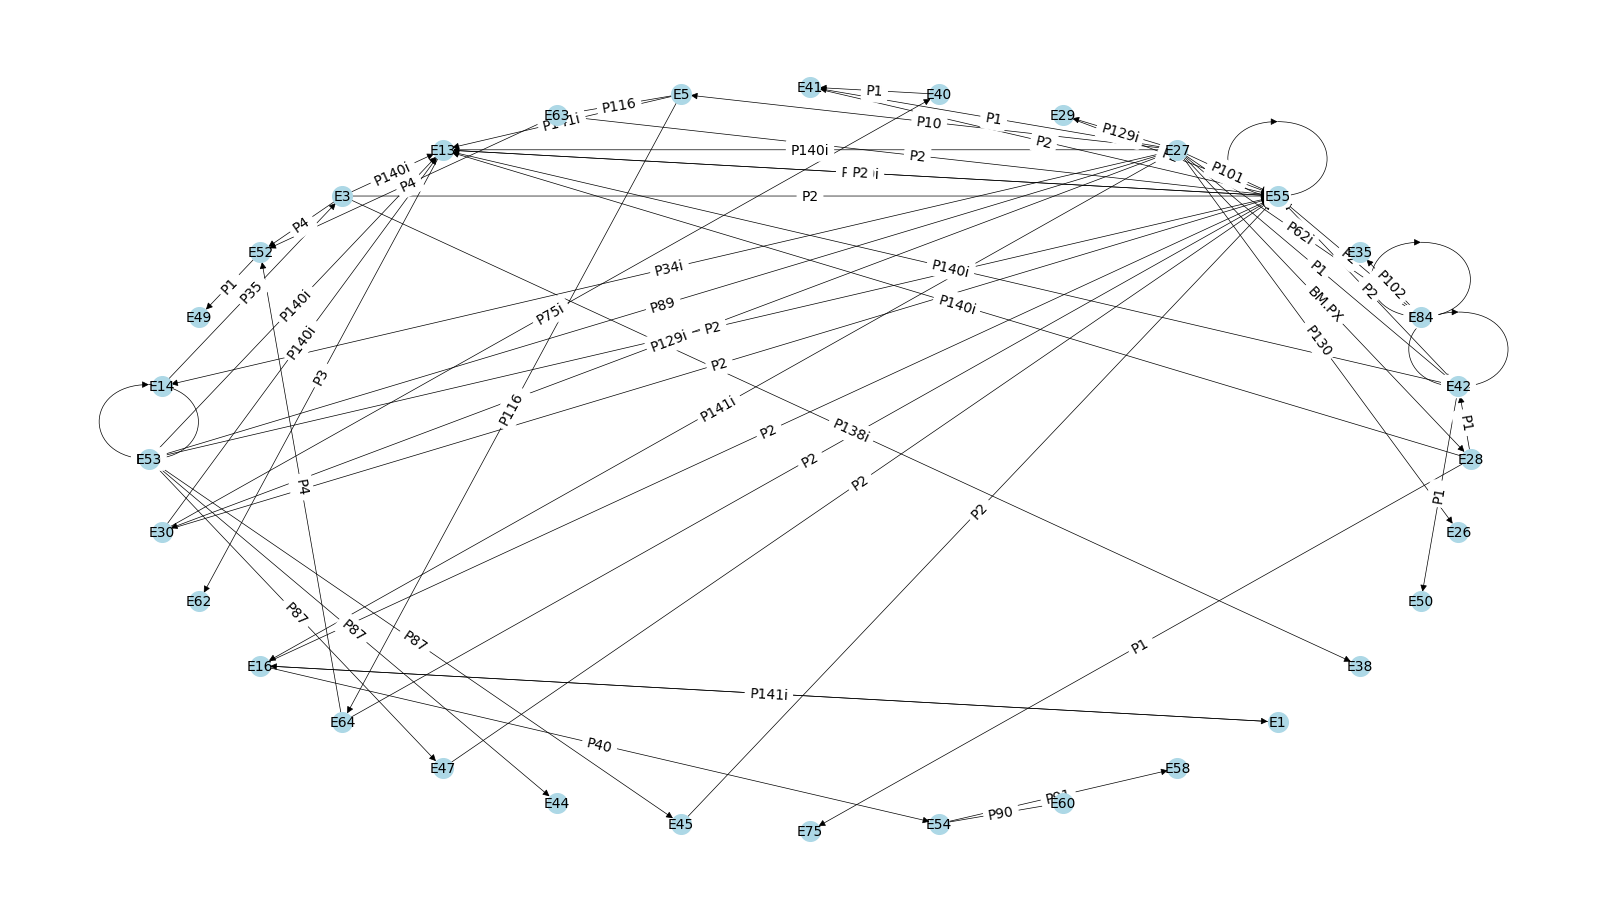

MAPSS_Heritage%20Place%20(3)


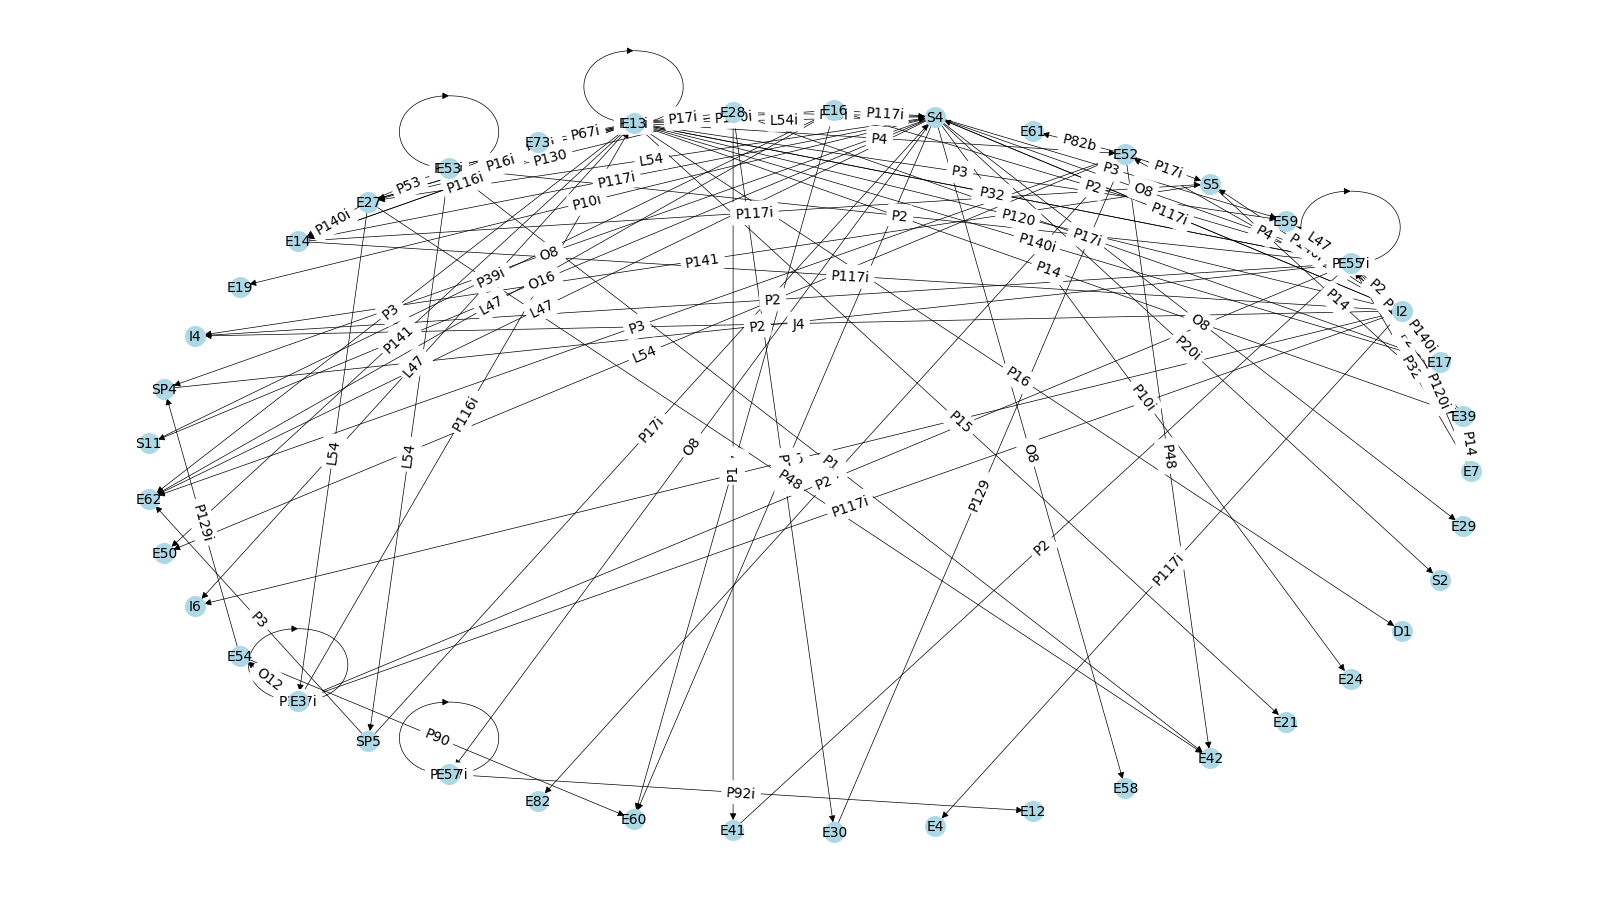

both


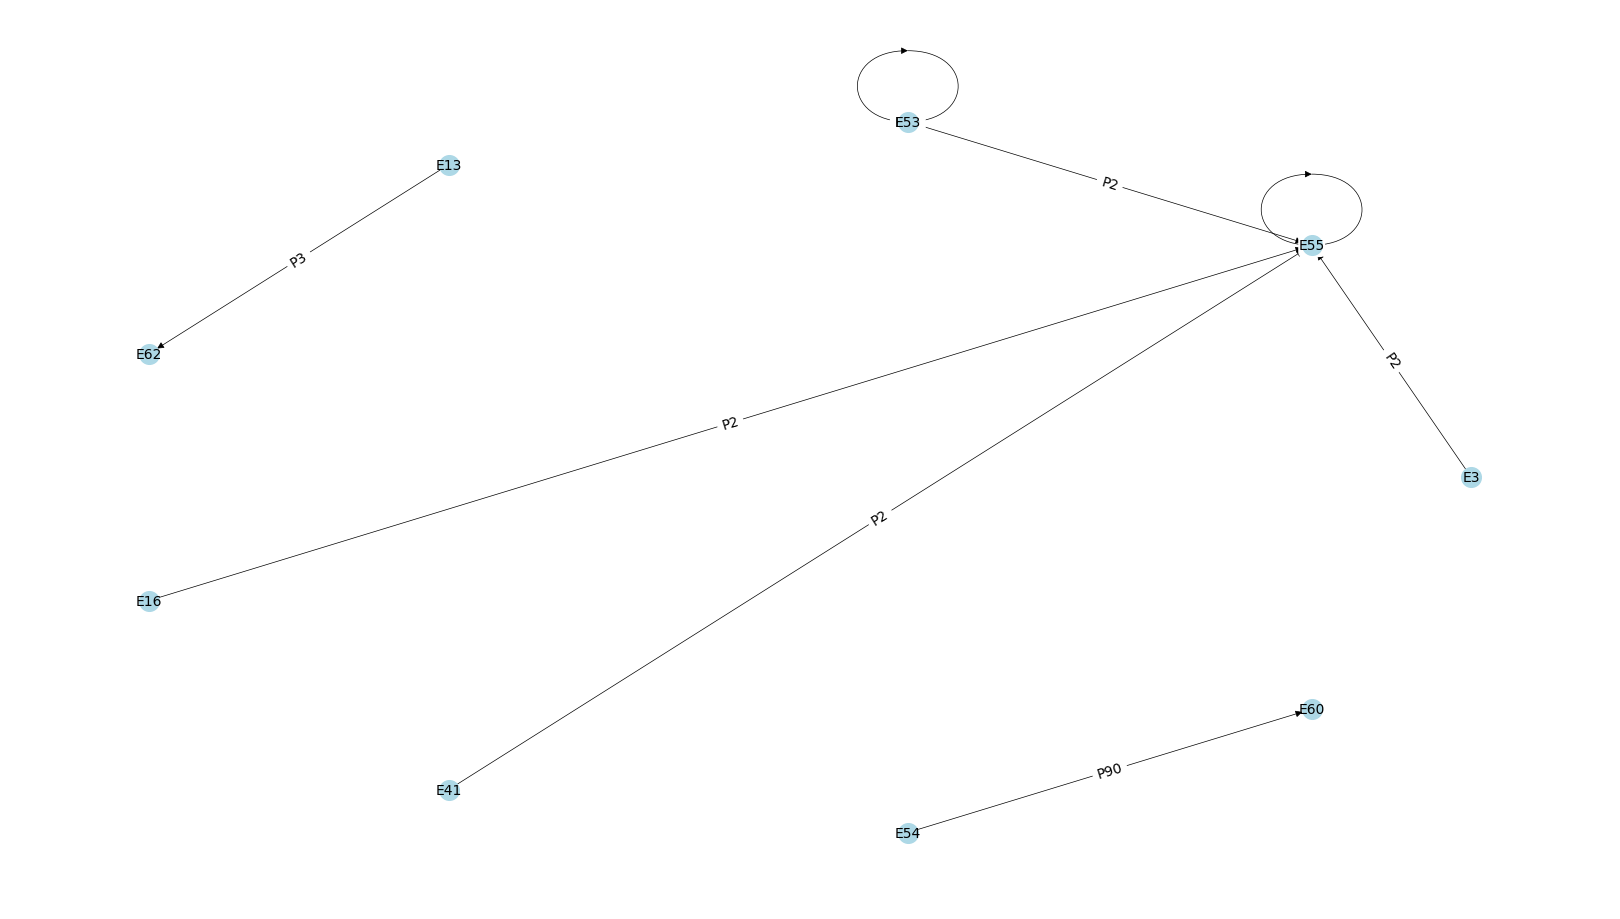

In [61]:
# # graph_list = []
# df_all_match = all_match(subgraph_metrics, comparison_metrics)
# rms = df_all_match['G'].unique()
# rms = rms.tolist()
# for rm in rms:
#   print(rm)
#   G = create_graph(rm, subgraph_metrics, comparison_metrics)
#   # graph_list.append(G)
#   plot_G(G)

def plot_all_G(subgraph_metrics, comparison_metrics, node_size = 200, node_color = "#add8e6", font_size = 10, fig_dim = 10):
	"""
	Plot all the graphs

    :param subgraph_metrics: Pandas dataframe of subgraphs
	:param comparison_metrics: Pandas dataframe of comparisons
	:param node_size: Node size
	:param node_color: Node color
	:param font_size: Font size
	:param fig_dim: Figure dimensions

	:return: Plot several networkx graphs

	:Example:
	>> plot_all_G(subgraph_metrics, comparison_metrics)
	"""
	df_all_match = all_match(subgraph_metrics, comparison_metrics)
	rms = df_all_match['G'].unique()
	rms = rms.tolist()
	for rm in rms:
		print(rm)
		G = create_graph(rm, subgraph_metrics, comparison_metrics)
		# graph_list.append(G)
		plot_G(G, node_size, node_color, font_size, fig_dim)

plot_all_G(subgraph_metrics, comparison_metrics)

Plot combined graphs

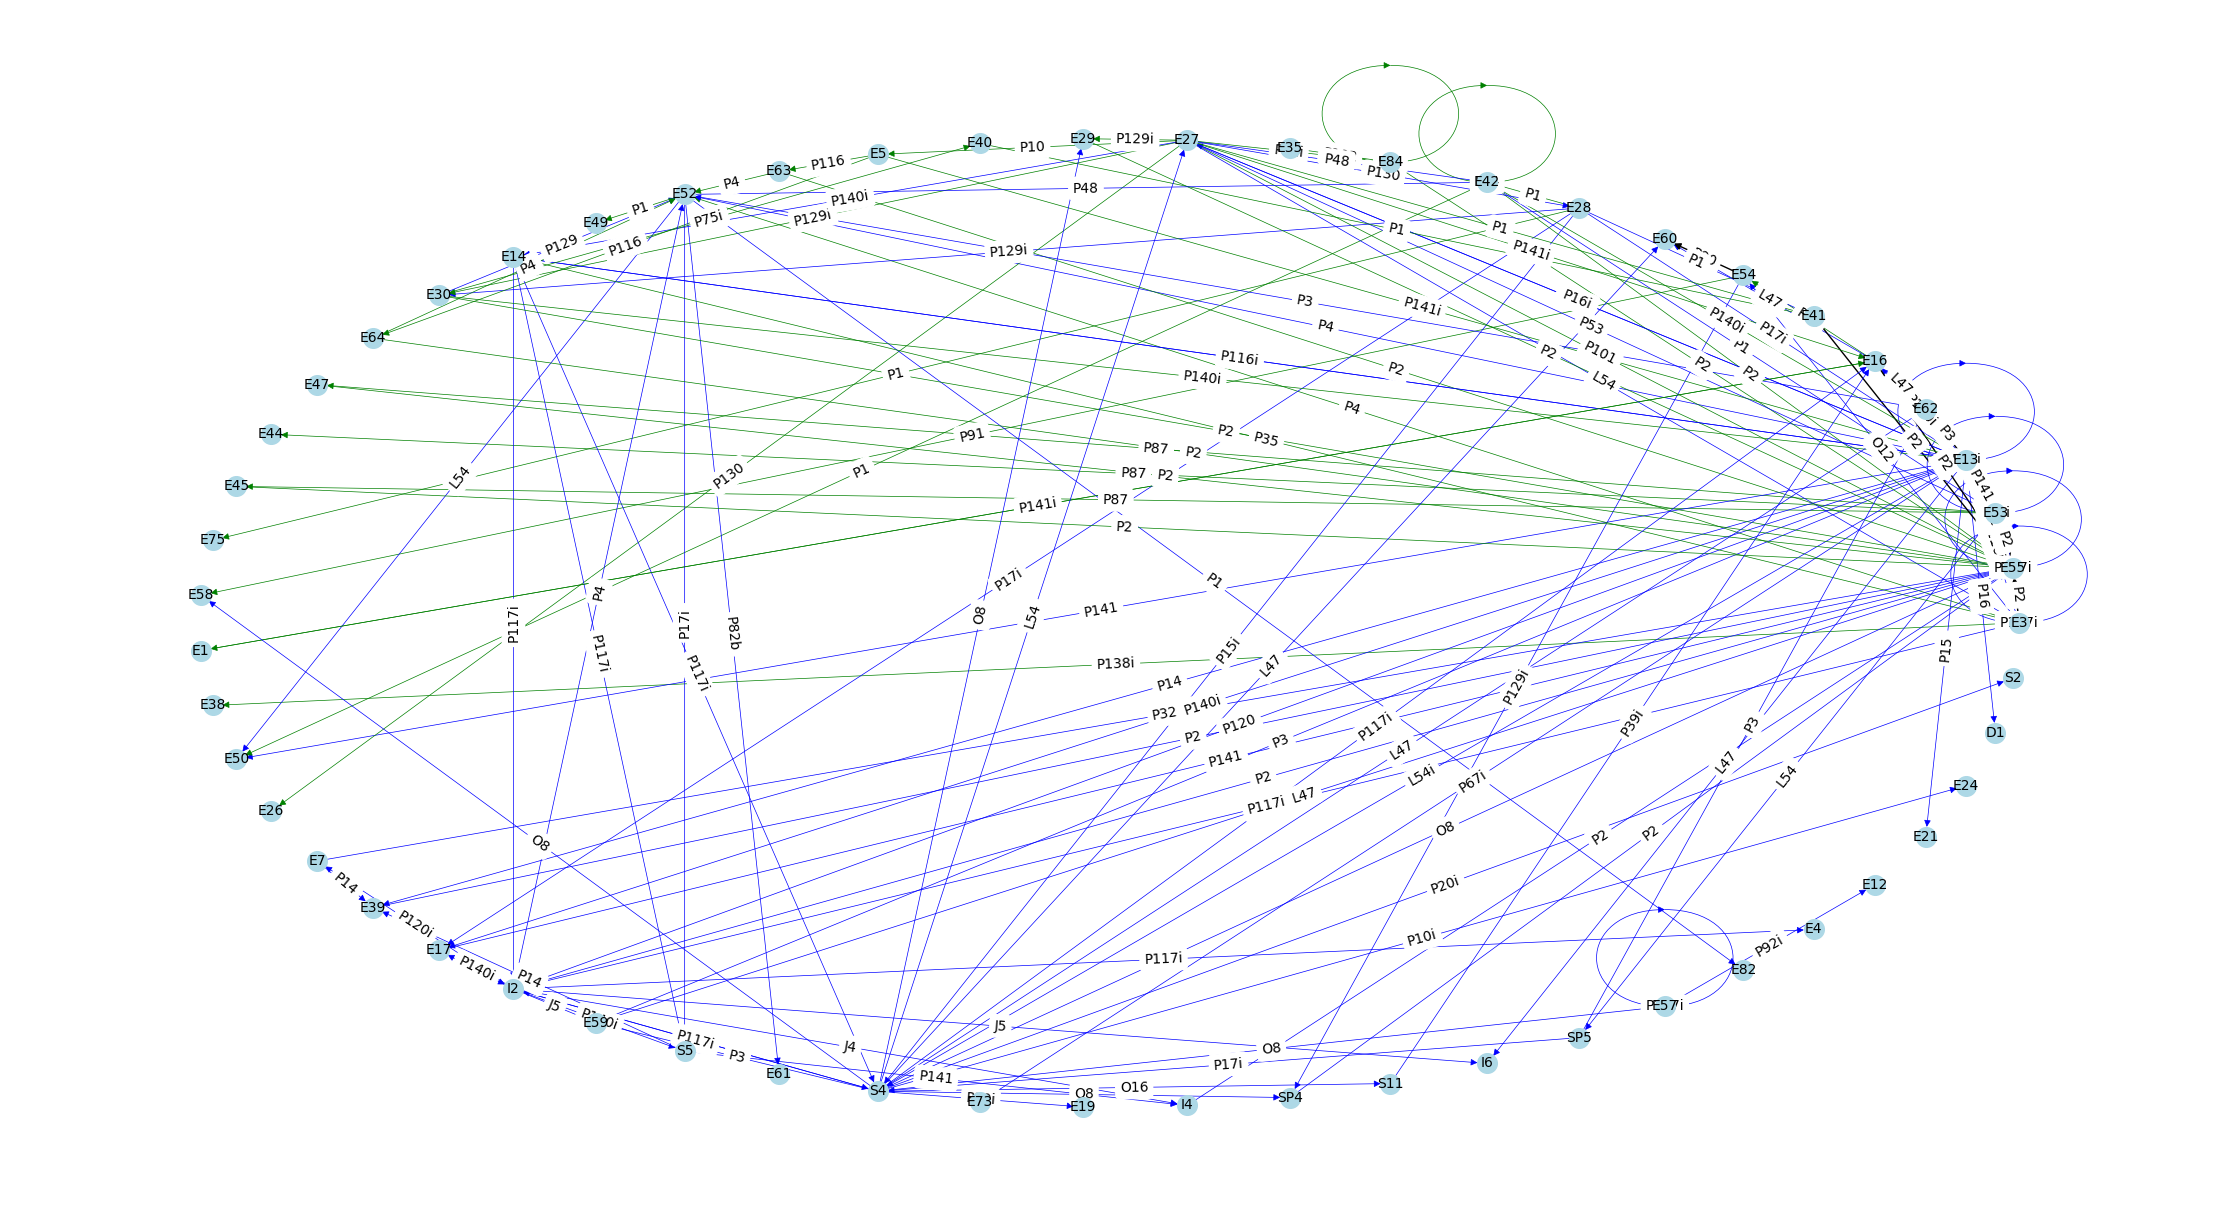

In [62]:
# # assign colors
# df_all_complete = subgraph_comparison_merge(subgraph_metrics, comparison_metrics)
# boths = df_all_complete['G'].unique().tolist()
# boths.remove('both')
# boths.append('both')
# colors = ['green', 'blue', 'red', 'yellow', 'purple']
# colors = colors[0:len(boths)-1]
# colors.append('black')
# df = pd.DataFrame(list(zip(boths, colors)),
#                columns =['G', 'color'])
# df_all_complete = df_all_complete.merge(df, left_on='G', right_on='G')

# # load with attributes
# G = nx.from_pandas_edgelist(df_all_complete, 'source', 'target', True, create_using=nx.DiGraph())
# for i in G.nodes():
#      G.nodes[i]['entity'] = re.sub(r'_.*', '',  i)

# edges = G.edges()
# colors = list(nx.get_edge_attributes(G,'color').values())
# weights = list(nx.get_edge_attributes(G,'weight').values())

# p = nx.circular_layout(G)
# labels_nodes = nx.get_node_attributes(G, 'entity')
# labels_nodes = nodes_labels(labels_nodes)
# labels_edges = nx.get_edge_attributes(G, 'property')
# labels_edges = edges_labels(labels_edges)
# plt.figure(figsize = (fig_dim + 12, fig_dim + 2))
# nx.draw(G, pos=p, labels = labels_nodes, with_labels = True, node_size = node_size, node_color = node_color, font_size = font_size, edge_color=colors, width=weights)
# nx.draw_networkx_edge_labels(G, pos=p, edge_labels = labels_edges)
# plt.show()

def all_nx_G(subgraph_metrics, comparison_metrics, colors = ['green', 'blue', 'red', 'yellow', 'purple']):
	"""
	Plot all the graphs separately 	# assign colors

    :param subgraph_metrics: Pandas dataframe of subgraphs
	:param comparison_metrics: Pandas dataframe of comparisons
	:param colors: List of colors. Only the first ones will be used.

	:return: A networkx graph

	:Example:
	>> G = all_nx_G(subgraph_metrics, comparison_metrics)
	"""
	df_all_complete = subgraph_comparison_merge(subgraph_metrics, comparison_metrics)
	boths = df_all_complete['G'].unique().tolist()
	boths.remove('both') #?
	boths.append('both') #?
	# colors = ['green', 'blue', 'red', 'yellow', 'purple']
	# subset on number of graphs
	colors = colors[0:len(boths)-1]
	colors.append('black')
	df = pd.DataFrame(list(zip(boths, colors)),
				columns =['G', 'color'])
	df_all_complete = df_all_complete.merge(df, left_on='G', right_on='G')
	# load with attributes
	G = nx.from_pandas_edgelist(df_all_complete, 'source', 'target', True, create_using=nx.DiGraph())
	for i in G.nodes():
		G.nodes[i]['entity'] = re.sub(r'_.*', '',  i)
	return G

def plot_all_nx_G(G, node_size = 200, node_color = "#add8e6", font_size = 10, fig_dim = 10):
	"""
	Plot all the graphs separately 	# assign colors

    :param subgraph_metrics: Pandas dataframe of subgraphs
	:param comparison_metrics: Pandas dataframe of comparisons
	:param node_size: Node size
	:param node_color: Node color
	:param font_size: Font size
	:param fig_dim: Figure dimensions

	:return: Plot one networkx graph merging all graphs

	:Example:
	>> G = all_nx_G(subgraph_metrics, comparison_metrics)
	>> plot_all_nx_G(G)
	"""
	edges = G.edges()
	colors = list(nx.get_edge_attributes(G,'color').values())
	weights = list(nx.get_edge_attributes(G,'weight').values())
	p = nx.circular_layout(G)
	labels_nodes = nx.get_node_attributes(G, 'entity')
	labels_nodes = nodes_labels(labels_nodes)
	labels_edges = nx.get_edge_attributes(G, 'property')
	labels_edges = edges_labels(labels_edges)
	plt.figure(figsize = (fig_dim + 12, fig_dim + 2))
	nx.draw(G, pos=p, labels = labels_nodes, with_labels = True, node_size = node_size, node_color = node_color, font_size = font_size, edge_color=colors, width=weights)
	nx.draw_networkx_edge_labels(G, pos=p, edge_labels = labels_edges)
	plt.show()

G = all_nx_G(subgraph_metrics, comparison_metrics)
plot_all_nx_G(G)

In [63]:
# # TODO: short node labels, node labels inside node shapes, label edges
# def display_pyvis(pyvis_graph, name):
#     filename = f"{name}.html"
#     pyvis_graph.save_graph(filename)
#     return HTML(filename=filename)

# g = net.Network(notebook = True, cdn_resources='remote', directed =True)
# g.show_buttons(filter_=["physics"])
# g.from_nx(G)
# display_pyvis(g, "pyvis-example")

def plot_all_pyvis_G(G, name = "pyvis-example", directed =True, notebook = True, cdn_resources='remote'):
	"""
	Plot an interactive pyvis graph

    :param G: Netwokx graph
	:param directed: If directed or not (default: True)
	:param notebook: If run in Jupyter Notebook (default: True)
	:param cdn_resources: If the upyter Notebook is hosted on a remote serevr (default: True)

	:return: Plot one pyvis graph merging all graphs

	:Example:
	>> plot_all_pyvis_G(G, "pyvis-example")
	"""
	g = net.Network(notebook = notebook, directed = directed, cdn_resources = cdn_resources)
	g.show_buttons(filter_=["physics"])
	g.from_nx(G)
	filename = f"{name}.html"
	g.save_graph(filename)
	return HTML(filename=filename)

plot_all_pyvis_G(G, "pyvis-example")
